# INSAID Hiring Exercise

## Important: Kindly go through the instructions mentioned below.

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models(Note: It should be more than 1 algorithm)
    4. Model Evaluation and concluding with the best of the model.
    
    
    

- Try to break the codes in the **simplest form** and use number of code block with **proper comments** to them
- We are providing **h** different dataset to choose from(Note: You need to select any one of the dataset from this sample sheet only)
- The **interview calls** will be made solely based on how good you apply the **concepts**.
- Good Luck! Happy Coding!

## Importing the library

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_row',100)

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

### Importing the data

In [63]:
dataset = pd.read_csv(r"D:\denis\Churn_itrshl.csv")

In [64]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Understanding the data

In [65]:
dataset.shape

(7043, 21)

In [66]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [67]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Checking null values in data

In [68]:
dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### On Missingness of data:
The data is clean and there are no missing values in the data


### Data Manipulation

## Observations:
#### On Type conversions:

-- Columns like CustomerID can be removed from the analysis

--We see that 'Tenure' and 'MonthlyCharges' are numeric columns present in the data, with the data close to normal distribution.

--Along with them, 'TotalCharges' is also a numeric column but contains some info missing, but still is not a nan.

--All the categorical attribtues are strings. Hence there is need to convert them into numbers, by a way of encoding.

--Among the categorical attribtues, majority of them have binary classes(2 levels). Label encoding would help assign labels 0,1 for the levels as appropriate.


In [69]:
dataset=dataset.drop(["customerID"], axis=True)

In [70]:
dataset['TotalCharges'].replace(to_replace = ' ', value= np.nan, inplace = True)
dataset['TotalCharges'] = dataset['TotalCharges'].astype(float)
dataset.dropna(axis=0, inplace=True)

### Data Visualization

In [71]:
cat_feats = [x for x in dataset.columns if dataset[x].dtype == "object" and x != "customerID"]
num_feats = [x for x in dataset.columns if dataset[x].dtype != "object"]

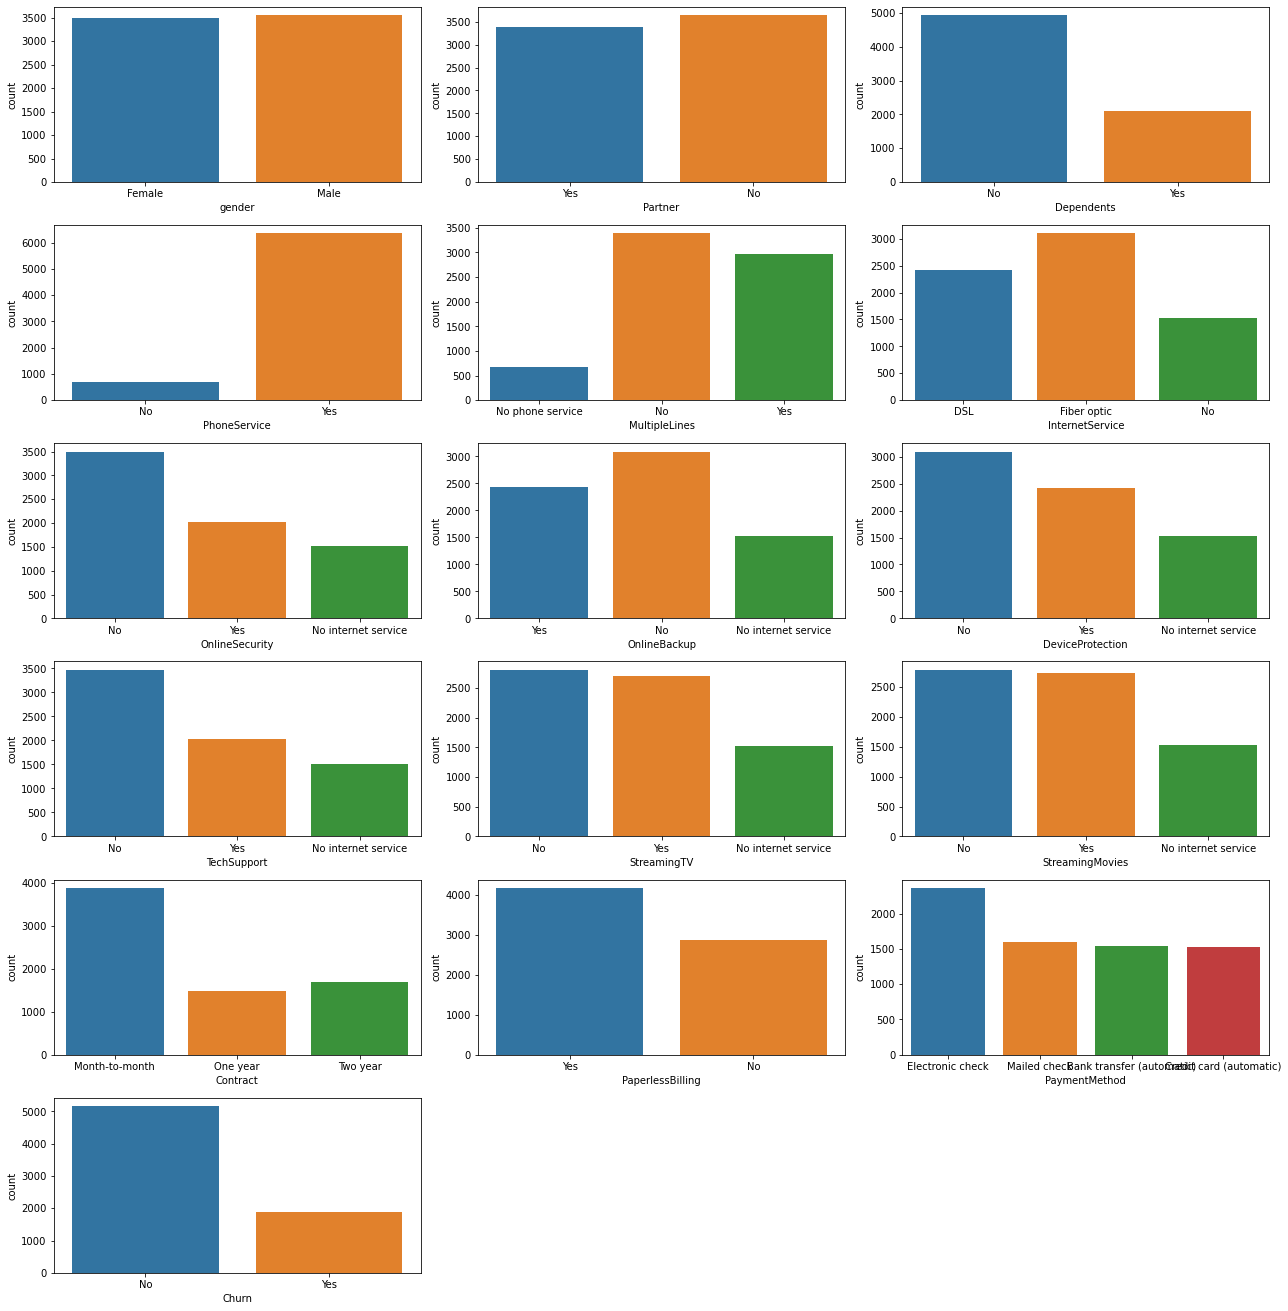

In [72]:
fig = plt.figure(figsize=(18, 30))

for i, col in enumerate(cat_feats):
    plt.subplot(10, 3, i+1)
    sns.countplot(x=dataset[col])
    plt.tight_layout()
fig.show()

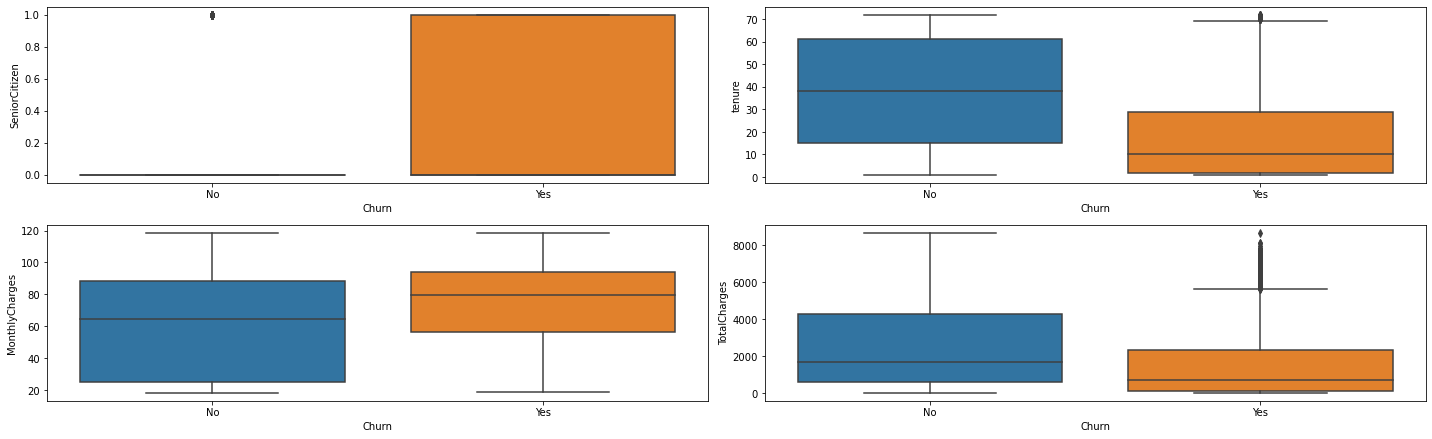

In [73]:
fig = plt.figure(figsize=(20, 30))

for i, col in enumerate(num_feats):
    plt.subplot(10, 2, i+1)
    sns.boxplot(x="Churn", y=col, data=dataset)
    plt.tight_layout()
fig.show()

### Checking how much affect tenure on churn 

<AxesSubplot:xlabel='tenure', ylabel='Count'>

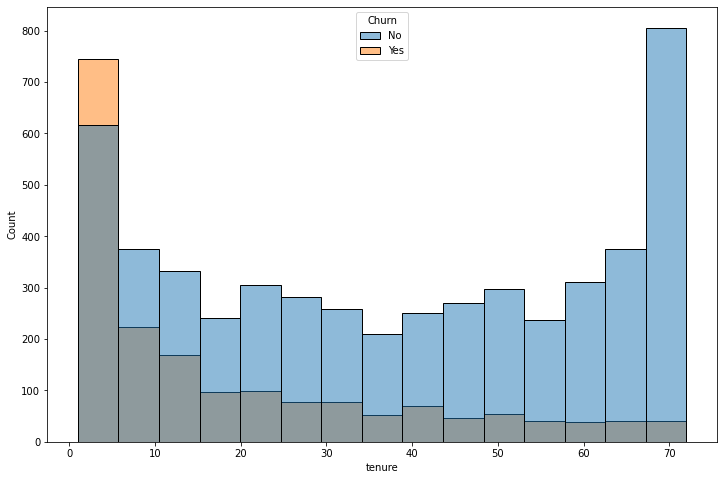

In [74]:
# sns.histplot(x='tenure',data=df)
plt.figure(figsize=(12,8))
sns.histplot(x='tenure',data=dataset,hue='Churn')

### Quick check of the distribution of our classes.

In [75]:
dataset.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:>

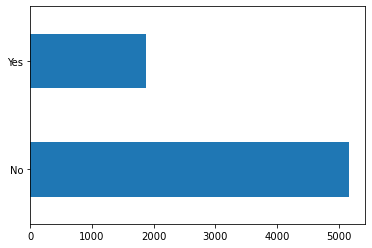

In [76]:
dataset['Churn'].value_counts().plot(kind = 'barh')

According to the result, we clearly see a huge difference between Churn and None-Churn. Due to that and in order to build good multivariate models we need to apply under/over sampling technics. Later in this exemple I will apply a simple under-sampling methodin order to have same length of both Churn and None Churn classes.

#### Apply label encoding for coverting categorical feature into numeric feature for understanding the python languare

In [77]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [78]:
dataset[dataset.select_dtypes(include=['object']).columns] = dataset[dataset.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [79]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Correlation chart

<AxesSubplot:>

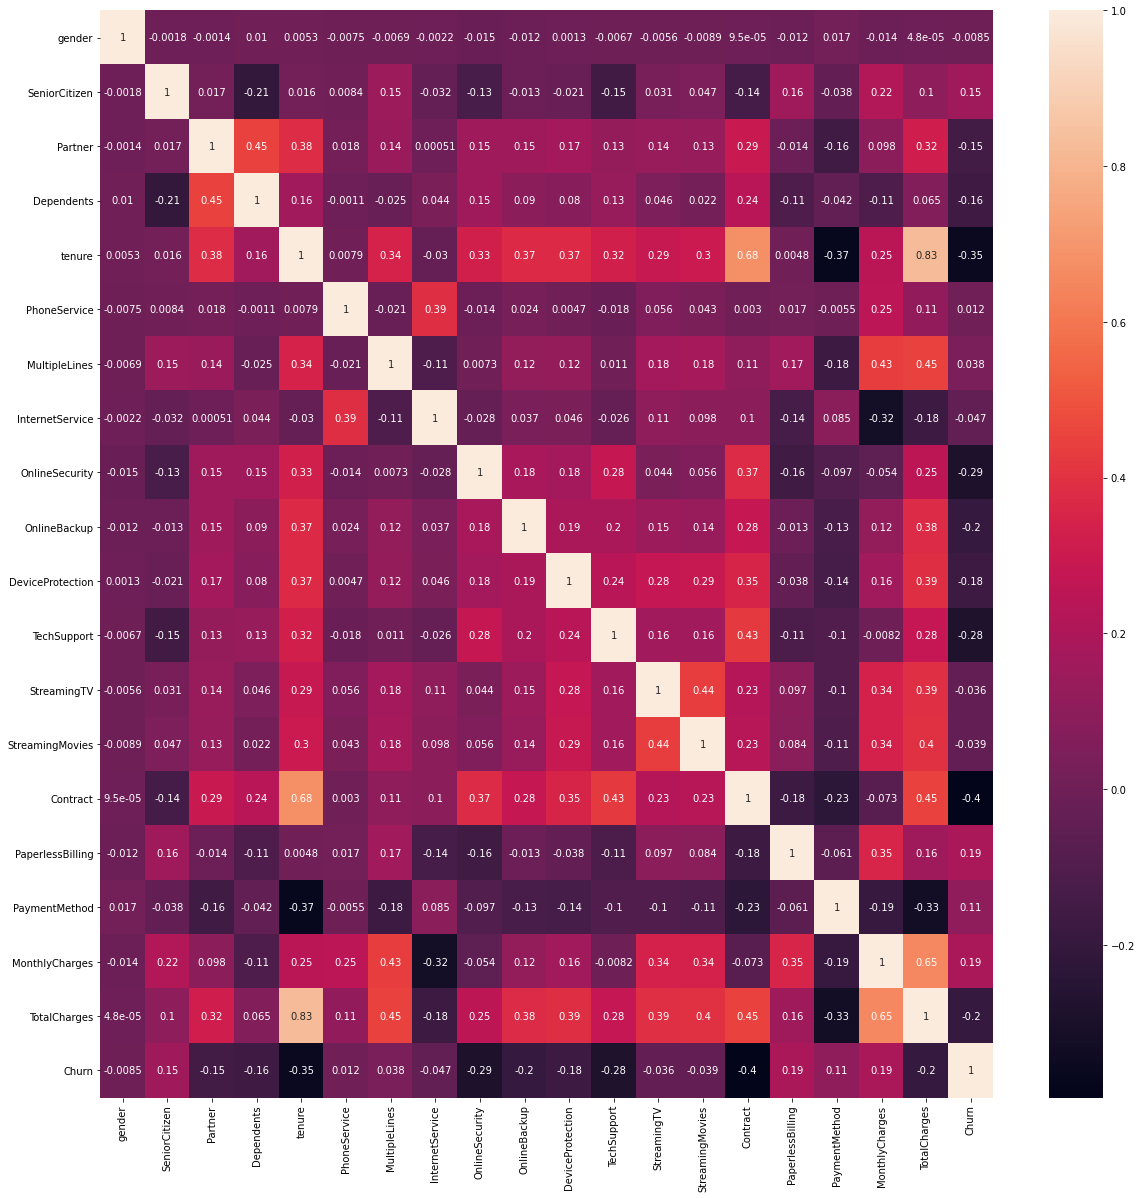

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(),annot= True )

### 
According to this heatmap we can clearly see a significante correlation between: Internet Service, Online Security, Online Backup,Device Protection, Tech Support,Streaming TV and Streaming Movies plus Contract and Tenure.



In [82]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


## Sampling

In [199]:
X = dataset.drop(["Churn"], axis=True)
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [200]:
Y=dataset.loc[:,"Churn"]
Y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

In [223]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split( X , Y, test_size = .2 , random_state = 40)

In [224]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5625, 19)
(1407, 19)
(5625,)
(1407,)


## Implement Machine Learning Models

### Model Building On Logistic Regresion

In [225]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [226]:
model1 = logreg.fit(X_train, y_train)
#print("Model Fitted Successfully!!!")

In [227]:
pred_log = model1.predict(X_test)

In [228]:
tab1 = confusion_matrix(pred_log, y_test)
print("Confusion Matrix:\n",tab1)
# evaluate predictions
acc1 = (accuracy_score(y_test, pred_log))*100
print("\nAccuracy: %.2f%%\n" % acc1)
print(classification_report(y_test,pred_log))

Confusion Matrix:
 [[907 142]
 [143 215]]

Accuracy: 79.74%

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1050
           1       0.60      0.60      0.60       357

    accuracy                           0.80      1407
   macro avg       0.73      0.73      0.73      1407
weighted avg       0.80      0.80      0.80      1407



### Model Build on RandomForestClassifier

In [229]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [230]:
model2=rf.fit(X_train , y_train)

In [231]:
pred_rf = rf.predict(X_test)
tab2 = confusion_matrix(pred_rf, y_test)
print("Confusion Matrix:\n",tab2)
# evaluate predictions
acc2 = (accuracy_score(y_test, pred_rf))*100
print("\nAccuracy: %.2f%%\n" % acc2)
print(classification_report(y_test,pred_rf))

Confusion Matrix:
 [[916 174]
 [134 183]]

Accuracy: 78.11%

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1050
           1       0.58      0.51      0.54       357

    accuracy                           0.78      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407



### Model Building on Ada boosting

In [210]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(base_estimator=None,
                              learning_rate=1.0,
                              n_estimators=1000)

In [211]:
# lets fit the model
model7 = abc.fit(X_train,y_train)
print("Model3 Fitted Successfully")

Model3 Fitted Successfully


In [212]:
pred7 = model7.predict(X_test)

In [213]:
tab7 = confusion_matrix(pred7,y_test)
print("Confusion matrix:\n",tab7)
# Evaluate Predictions
acc7 = (accuracy_score(y_test,pred7))*100
print("\nAccuracy: %.2f%%\n" % acc7)
print(classification_report(y_test,pred7))

Confusion matrix:
 [[915 179]
 [118 195]]

Accuracy: 78.89%

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.62      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



## Deal with Class imbalances

## 
As stated before the dataset is imbalanced, so to deal with such problem,with the help of under / oversampling methods should be used. Smote and several others technics were performeing.

In [232]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
Counter(y_train)

Counter({0: 4113, 1: 1512})

In [244]:
os=RandomOverSampler(0.65)
X_train_ns_new,y_train_ns_new=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns_new)))

The number of classes before fit Counter({0: 4113, 1: 1512})
The number of classes after fit Counter({0: 4113, 1: 2673})


## Model build on Logistic Regression using Smote

In [245]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [246]:
model3 = logreg.fit(X_train_ns_new,y_train_ns_new)
print("Model has Fitted")

y_pred_smote_gb=model3.predict(X_test)
acc3 = (accuracy_score(y_test,y_pred_smote_gb))*100
print("\nAccuracy: %.2f%%\n" % acc3)
print(classification_report(y_pred_smote_gb, y_test))

Model has Fitted

Accuracy: 75.69%

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       912
           1       0.71      0.52      0.60       495

    accuracy                           0.76      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.75      0.76      0.75      1407



## Model build on randomforestclassifier using SMOTE

In [320]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [321]:
model11=rf.fit(X_train_ns_new,y_train_ns_new)

In [322]:
y_pred_smote_rf = model11.predict(X_test)

In [323]:
tab11 = confusion_matrix(y_pred_smote_rf, y_test)
print("Confusion Matrix:\n",tab11)
# evaluate predictions
acc11 = (accuracy_score(y_test, y_pred_smote_rf))*100
print("\nAccuracy: %.2f%%\n" % acc11)
print(classification_report(y_test,y_pred_smote_rf))

Confusion Matrix:
 [[837  90]
 [213 267]]

Accuracy: 78.46%

              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1050
           1       0.56      0.75      0.64       357

    accuracy                           0.78      1407
   macro avg       0.73      0.77      0.74      1407
weighted avg       0.81      0.78      0.79      1407



<AxesSubplot:>

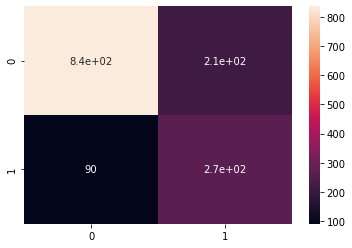

In [325]:
sns.heatmap(confusion_matrix(y_test,y_pred_smote_rf),annot=True)

### Final Conclusions:

### The finaly submitiion on RandomForestClassification Using Smote bcause data are imbalances we net to balances this first. The predictions made by the model and based on the precision and recall scores, as F1 Score try to show a balance between these two metrics, the precision was 90%, what means that the model predict correctly 90% of classified clients as churned, on other hand, the recall was good, where aroubd 80% of the actually churned clients was predict correctly.